# Heart Disease Prediction

In this project I analysed a data set which have various kinds of data coulmns that need to visualise and come to a decision whether the particular column is necessary to the final outcome or not. 
And I have cleaned the dataset for some unfair value entries

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
%matplotlib inline
import seaborn as sb

In [165]:
df = pd.read_csv('/Users/pavankumar/Desktop/My Folder/Jupyter_Practice_Files/heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [123]:
print('Heart Disease' ,df.HeartDisease.unique())
print('BMI', df.BMI.unique())
print('Age Category', df.AgeCategory.unique())

Heart Disease ['No' 'Yes']
BMI [16.6  20.34 26.58 ... 62.42 51.46 46.56]
Age Category ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']


In [124]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [166]:
df[df.SleepTime == 1].head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
581,No,32.95,No,No,No,30.0,0.0,Yes,Female,40-44,Black,No,Yes,Excellent,1.0,No,No,No
896,No,35.11,No,No,No,30.0,30.0,Yes,Female,55-59,Black,No,Yes,Fair,1.0,Yes,No,No
1702,No,19.97,No,No,No,15.0,3.0,No,Female,65-69,Black,No,Yes,Fair,1.0,Yes,Yes,No
3267,No,30.11,No,No,No,0.0,0.0,No,Female,18-24,White,No,Yes,Excellent,1.0,No,No,No
4458,No,33.00,No,No,No,0.0,0.0,No,Male,40-44,Hispanic,No,Yes,Excellent,1.0,Yes,No,No


<AxesSubplot:xlabel='BMI', ylabel='HeartDisease'>

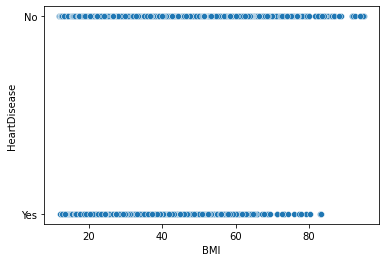

In [126]:
sb.scatterplot(data = df, x = 'BMI', y = 'HeartDisease')

In [128]:
l = len(df.groupby('AgeCategory')['AgeCategory'].agg('count'))
l

13

In [129]:
def get_values(DF, col, i):
    return DF.groupby(col)[col].agg('count')[i] 


In [167]:
df1 = df[df['HeartDisease'] == 'Yes']
df1.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
10,Yes,34.30,Yes,No,No,30.0,0.0,Yes,Male,60-64,White,Yes,No,Poor,15.0,Yes,No,No
35,Yes,32.98,Yes,No,Yes,10.0,0.0,Yes,Male,75-79,White,Yes,Yes,Poor,4.0,No,No,Yes
42,Yes,25.06,No,No,No,0.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,7.0,No,No,Yes
43,Yes,30.23,Yes,No,No,6.0,2.0,Yes,Female,75-79,White,Yes,Yes,Fair,8.0,No,Yes,No


In [131]:
df1.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,27373.000000,27373.000000,27373.000000,27373.000000
mean,29.401592,7.808242,4.641764,7.136156
std,6.577151,11.487819,9.171932,1.780863
min,12.210000,0.000000,0.000000,1.000000
25%,25.060000,0.000000,0.000000,6.000000
50%,28.340000,0.000000,0.000000,7.000000
75%,32.690000,15.000000,4.000000,8.000000
max,83.330000,30.000000,30.000000,24.000000


In [168]:
df2 = df[df['HeartDisease'] == 'No']
df2.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [133]:
t = []
for i in range(l):
    t.append(get_values(df, 'AgeCategory', i))

t1 = []
for i in range(l):
    t1.append(get_values(df1, 'AgeCategory', i))

t2 = []
for i in range(l):
    t2.append(get_values(df2, 'AgeCategory', i))
t, t1, t2

([21064,
  16955,
  18753,
  20550,
  21006,
  21791,
  25382,
  29757,
  33686,
  34151,
  31065,
  21482,
  24153],
 [130, 133, 226, 296, 486, 744, 1383, 2202, 3327, 4101, 4847, 4049, 5449],
 [20934,
  16822,
  18527,
  20254,
  20520,
  21047,
  23999,
  27555,
  30359,
  30050,
  26218,
  17433,
  18704])

In [134]:
df1.groupby('AgeCategory')['AgeCategory'].agg('count')

AgeCategory
18-24           130
25-29           133
30-34           226
35-39           296
40-44           486
45-49           744
50-54          1383
55-59          2202
60-64          3327
65-69          4101
70-74          4847
75-79          4049
80 or older    5449
Name: AgeCategory, dtype: int64

In [135]:
age = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '64-69', '69-74', '75-79', 
      '80 or older']

### Visualization

Text(0.5, 1.0, 'Age wise getting heart attack')

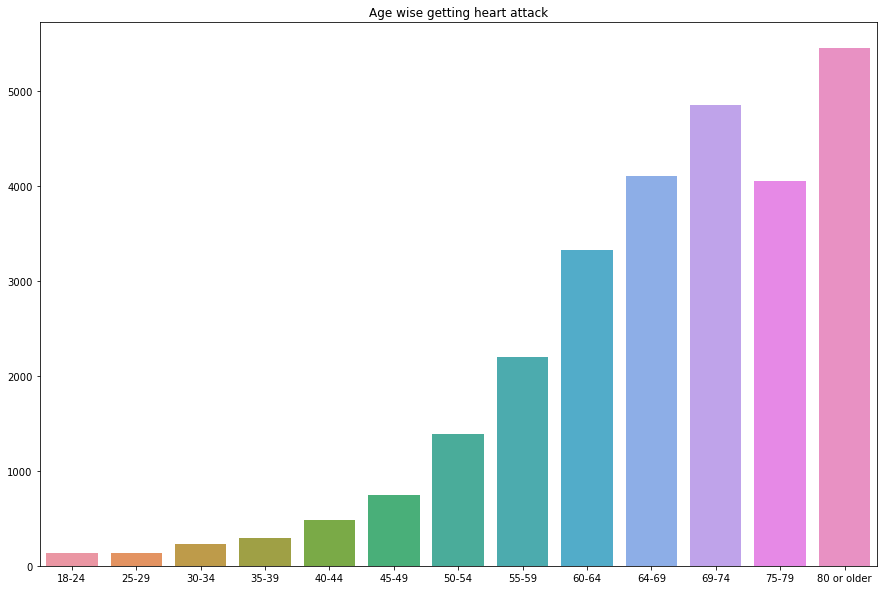

In [136]:
pt.figure(figsize = (15,10))
sb.barplot(x = age, y = t1)
pt.title('Age wise getting heart attack')

In [137]:
df1.groupby('Sex')['Sex'].agg('count')

Sex
Female    11234
Male      16139
Name: Sex, dtype: int64

In [138]:
gender = list(df1.Sex.unique())
g_yes_coun = list(df1.groupby('Sex')['Sex'].agg('count'))

Text(0.5, 1.0, 'Having Stroke Getting Heart Disease')

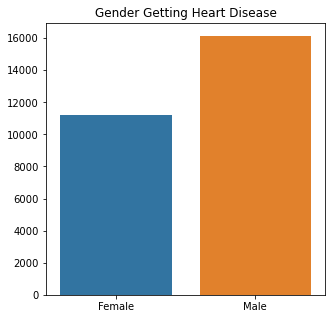

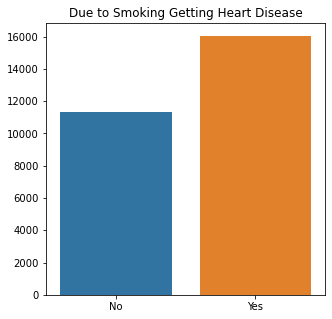

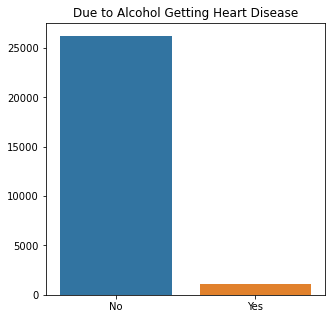

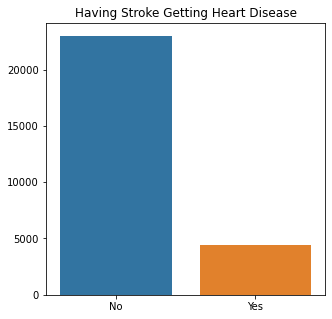

In [139]:
pt.figure(figsize = (5,5))
sb.barplot(x = gender, y = g_yes_coun)
pt.title('Gender Getting Heart Disease')
smoking_count = list(df1.groupby('Smoking')['Smoking'].agg('count'))
smoking = ['No', 'Yes']
pt.figure(figsize = (5,5))
sb.barplot(x = smoking, y = smoking_count)
pt.title('Due to Smoking Getting Heart Disease')
alc_count = list(df1.groupby('AlcoholDrinking')['AlcoholDrinking'].agg('count'))
alc = ['No', 'Yes']
pt.figure(figsize = (5,5))
sb.barplot(x = alc, y = alc_count)
pt.title('Due to Alcohol Getting Heart Disease')
stroke_count = list(df1.groupby('Stroke')['Stroke'].agg('count'))
stroke = ['No', 'Yes']
pt.figure(figsize = (5,5))
sb.barplot(x = stroke, y = stroke_count)
pt.title('Having Stroke Getting Heart Disease')

In [140]:
df1.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
10,Yes,34.30,Yes,No,No,30.0,0.0,Yes,Male,60-64,White,Yes,No,Poor,15.0,Yes,No,No
35,Yes,32.98,Yes,No,Yes,10.0,0.0,Yes,Male,75-79,White,Yes,Yes,Poor,4.0,No,No,Yes
42,Yes,25.06,No,No,No,0.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,7.0,No,No,Yes
43,Yes,30.23,Yes,No,No,6.0,2.0,Yes,Female,75-79,White,Yes,Yes,Fair,8.0,No,Yes,No


<AxesSubplot:xlabel='PhysicalHealth', ylabel='SleepTime'>

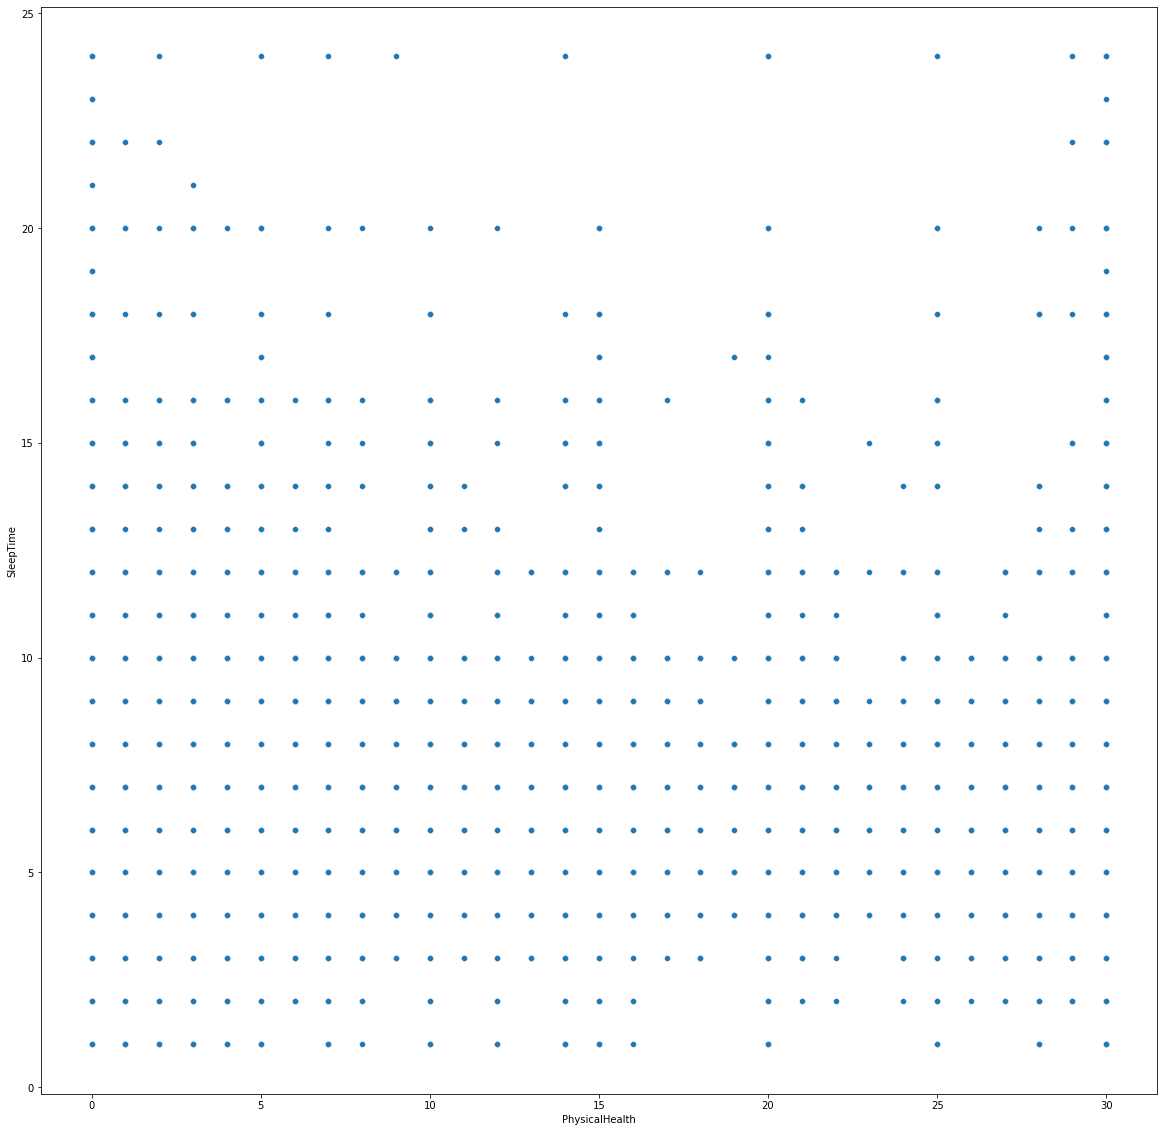

In [141]:
pt.figure(figsize = (20, 20))
sb.scatterplot(data = df, x = 'PhysicalHealth', y = 'SleepTime')

In [142]:
df.groupby('SleepTime')['SleepTime'].agg('count')

SleepTime
1.0       551
2.0       788
3.0      1992
4.0      7750
5.0     19184
6.0     66721
7.0     97751
8.0     97602
9.0     16041
10.0     7796
11.0      415
12.0     2205
13.0       97
14.0      243
15.0      189
16.0      236
17.0       21
18.0      102
19.0        3
20.0       64
21.0        2
22.0        9
23.0        3
24.0       30
Name: SleepTime, dtype: int64

Deleting the rows that sleep time is greater than 14

In [169]:
df3 = df.drop(df[df['SleepTime'] >= 14].index)
df3 = df3.drop(df[df['SleepTime'] <= 2].index)
df3.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [144]:
df3.groupby('SleepTime')['SleepTime'].agg('count')

SleepTime
3.0      1992
4.0      7750
5.0     19184
6.0     66721
7.0     97751
8.0     97602
9.0     16041
10.0     7796
11.0      415
12.0     2205
13.0       97
Name: SleepTime, dtype: int64

In [145]:
df3.Race.unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [170]:
df4 = df3.copy()
df4.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


Changing the values into numerical entries

In [147]:
dic = {'Yes': 1, 'No': 0}
df4['HeartDisease'] = df4['HeartDisease'].map(dic)
df4['Smoking'] = df4['Smoking'].map(dic)
df4['AlcoholDrinking'] = df4['AlcoholDrinking'].map(dic)
df4['Stroke'] = df4['Stroke'].map(dic)
df4['DiffWalking'] = df4['DiffWalking'].map(dic)
df4['PhysicalActivity'] = df4['PhysicalActivity'].map(dic)
df4['Asthma'] = df4['Asthma'].map(dic)
df4['KidneyDisease'] = df4['KidneyDisease'].map(dic)
df4['SkinCancer'] = df4['SkinCancer'].map(dic)
df4

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,White,Yes,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,White,No,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,White,Yes,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,White,No,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,White,No,1,Very good,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,Male,60-64,Hispanic,Yes,0,Fair,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,Male,35-39,Hispanic,No,1,Very good,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,Female,45-49,Hispanic,No,1,Good,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,Female,25-29,Hispanic,No,0,Good,12.0,0,0,0


In [148]:
print(df4.Race.unique())
print(df4.GenHealth.unique())
df.Diabetic.unique()

['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
['Very good' 'Fair' 'Good' 'Excellent' 'Poor']


array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [149]:
df4['Sex'] = df4['Sex'].map({'Male': 1, 'Female': 0})
df4['Race'] = df4['Race'].map({'White': 1, 'Black': 2, 'Asian': 3, 'American Indian/Alaskan Native': 4,
                              'Hispanic': 5, 'Other': 5})
df4['GenHealth'] = df4['GenHealth'].map({
    'Poor': 1, 'Fair': 2, 'Good': 3, 'Very good': 4, 'Excellent': 5
})
df4['Diabetic'] = df4['Diabetic'].map({'Yes': 1,
                                      'No': 2, 'No, borderline diabetes': 3,
                                      'Yes (during pregnancy)': 4})

In [171]:
df4.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [151]:
df4.AgeCategory.unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [152]:
df4['AgeCategory'] = df4['AgeCategory'].map({
    '18-24': 1, '25-29': 2, '30-34': 3, '35-39': 4, '40-44': 5, '45-49': 6, '50-54': 7, '55-59': 8,
    '60-64': 9, '65-69': 10, '70-74': 11, '75-79': 12, '80 or older': 13
})
df4

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,8,1,1,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,13,1,2,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,10,1,1,1,2,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,12,1,2,0,3,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,5,1,2,1,4,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,9,5,1,0,2,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,4,5,2,1,4,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,6,5,2,1,3,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,2,5,2,0,3,12.0,0,0,0


In [153]:
X = df4.drop(['HeartDisease'], axis = 'columns')
X

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,1,0,0,3.0,30.0,0,0,8,1,1,1,4,5.0,1,0,1
1,20.34,0,0,1,0.0,0.0,0,0,13,1,2,1,4,7.0,0,0,0
2,26.58,1,0,0,20.0,30.0,0,1,10,1,1,1,2,8.0,1,0,0
3,24.21,0,0,0,0.0,0.0,0,0,12,1,2,0,3,6.0,0,0,1
4,23.71,0,0,0,28.0,0.0,1,0,5,1,2,1,4,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,1,0,0,7.0,0.0,1,1,9,5,1,0,2,6.0,1,0,0
319791,29.84,1,0,0,0.0,0.0,0,1,4,5,2,1,4,5.0,1,0,0
319792,24.24,0,0,0,0.0,0.0,0,0,6,5,2,1,3,6.0,0,0,0
319793,32.81,0,0,0,0.0,0.0,0,0,2,5,2,0,3,12.0,0,0,0


In [154]:
y = df4.HeartDisease
y.head()

0    0
1    0
2    0
3    0
4    0
Name: HeartDisease, dtype: int64

Splitting the data for test and train

In [155]:
from sklearn.model_selection import train_test_split

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [157]:
X_train.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
292381,24.33,1,0,0,0.0,0.0,0,0,10,1,2,1,4,8.0,0,0,0
95044,30.11,1,0,0,30.0,0.0,1,0,11,1,2,0,2,8.0,1,0,0
86724,31.53,1,0,0,0.0,15.0,0,0,7,1,2,1,3,6.0,1,0,0
101990,28.35,1,0,0,0.0,0.0,0,0,12,1,1,1,4,7.0,0,0,1
226643,23.57,0,0,0,0.0,1.0,0,0,3,1,2,1,5,7.0,0,0,0


## Model Selection

In [158]:
from sklearn.ensemble import RandomForestClassifier

In [159]:
model = RandomForestClassifier()

In [160]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [161]:
model.score(X_test, y_test)

0.9064886397631906

In [162]:
import pickle
with open('Heart Disease Prediction Model', 'wb') as f:
    pickle.dump(model, f)

In [164]:
model.predict([[35, 0, 0, 0, 29, 15, 1, 1, 1, 3, 2, 1, 5, 9, 0, 0, 0]])

array([0])

In [172]:
from sklearn.tree import DecisionTreeClassifier

In [173]:
m1 = DecisionTreeClassifier()

In [174]:
m1.fit(X_train, y_train)

DecisionTreeClassifier()

In [175]:
m1.score(X_test, y_test)

0.8661649163137094